In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
sales = pd.read_csv('Datasets/gameSales2016.csv', sep=',')

In [3]:
from sklearn import tree
import graphviz

def plot_tree_classification(model, features, class_names):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          class_names=class_names,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

In [4]:
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

In [5]:
sales['Genre'].fillna("Unknown")
sales['Global_Sales'].fillna(sales['Global_Sales'].mean())
sales = sales.dropna()

In [6]:
sales.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [7]:
sales_train, sales_test = train_test_split(sales, test_size=0.3, stratify=sales['Genre'], random_state=42)
print(sales_train.shape, sales_test.shape)

(4777, 16) (2048, 16)


In [8]:
features= ['Critic_Score', 'Global_Sales']
dt = DecisionTreeClassifier(max_depth = 4) # Increase max_depth to see effect in the plot
dt.fit(sales[features], sales['Genre'])

DecisionTreeClassifier(max_depth=4)

In [9]:
predictionsOnTrainSet = dt.predict(sales_train[features])
predictionsOnTestSet = dt.predict(sales_test[features])

accuracyTrain = calculate_accuracy(predictionsOnTrainSet, sales_train.Genre)
accuracyTest = calculate_accuracy(predictionsOnTestSet, sales_test.Genre)

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.2566464308143186
Accuracy on test set 0.26171875


<font color='blue'><b><i>I expected the accuracy of the the prediction on the training set to be higher than the test set. But it seems like the predictions are more accurate on the test set.

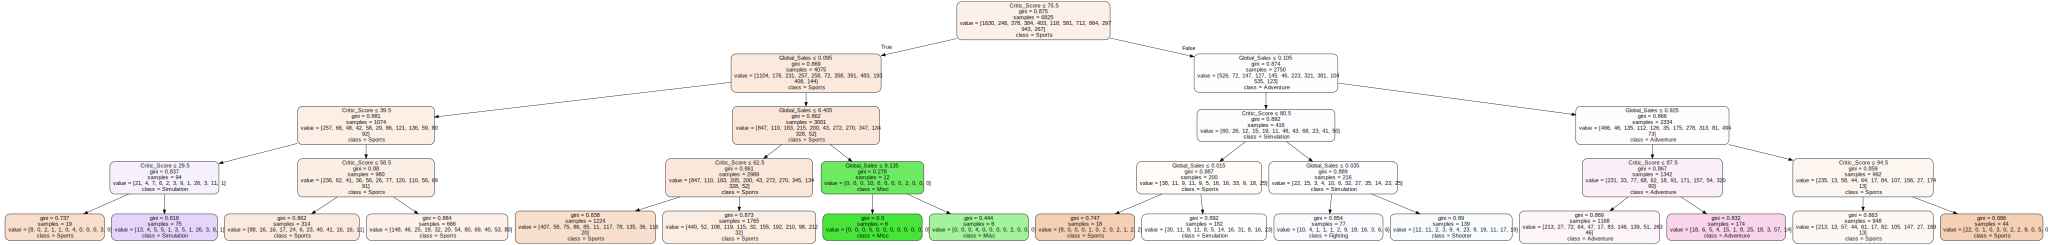

In [10]:
plot_tree_classification(dt, features, sales.Genre.unique())

<font color='blue'><b><i>Ik weet niet zeker waarom de genre Sport zo veel voorkomt. N.a.v assignment 12 waar een bivariate analysis word gedaan op global sales en critic score is er niks opmerkelijks tevoorschijn gekomen bij de genre Sports.